# Import library




In [1]:
# import package library
import numpy as np
import pandas as pd
# some imports to set up plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

## Dealing with missing values

Import data from temporary storage:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Data/Operations_empty.csv')
df.head()

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America
1,10001,Company,Cash,NaN,651750.0,1043,Japan,Asia
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe
4,10004,Person,Transfer,512300.0,NaN,1024,Argentina,America


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer       19 non-null     int64  
 1   Customer Type  19 non-null     object 
 2   Payment Type   19 non-null     object 
 3   Purchases      18 non-null     float64
 4   Sales          18 non-null     float64
 5   Refunds        19 non-null     int64  
 6   Country        19 non-null     object 
 7   Continent      19 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 1.3+ KB


In [5]:
df.describe()

,Customer,Purchases,Sales,Refunds
count,19.000000,18.000000,18.000000,19.000000
mean,10009.000000,446655.277778,558967.611111,819.210526
std,5.627314,171223.757967,214303.580957,439.467554
min,10000.000000,83000.000000,103750.000000,0.000000
25%,10004.500000,375525.000000,469406.250000,592.000000
50%,10009.000000,453165.000000,566606.000000,910.000000
75%,10013.500000,536000.000000,670125.000000,1062.500000
max,10018.000000,741000.000000,926250.000000,1482.000000


### Drop NA

In [6]:
# count NAN in each column
df.isnull().sum()

Customer         0
Customer Type    0
Payment Type     0
Purchases        1
Sales            1
Refunds          0
Country          0
Continent        0
dtype: int64

In [7]:
# อันนี้เป็นตัวอย่างเฉย ๆ

# drop na
df.dropna(axis = 1) # ลบทั้ง col ที่มี na เลย ซึ่ง Purchases และ Sales จะหายไป

# df.dropna(axis = 1, inplace = True) ถ้าใส่ inplace = True จะลบไปจริง ๆ เลย โดยที่ไม่ต้องสร้างตัวแปรมาเก็บรองรับ

,Customer,Customer Type,Payment Type,Refunds,Country,Continent
0,10000,Person,Cash,240,Canada,America
1,10001,Company,Cash,1043,Japan,Asia
2,10002,Company,Credit Card,902,Mexico,America
3,10003,Company,Transfer,1130,Spain,Europe
4,10004,Person,Transfer,1024,Argentina,America
5,10005,Person,Transfer,0,Canada,America
6,10006,Company,Credit Card,1392,EEUU,America
7,10007,Person,Cash,1482,Chile,America
8,10008,Company,Cash,1082,EEUU,America
9,10009,Company,Cash,166,EEUU,America


In [9]:
# ลบแถวของข้อมูลที่มีค่า NaN ในคอลัมน์ 'Purchases'
df.dropna(subset = ['Purchases'], axis = 0, inplace = True)
df

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe
4,10004,Person,Transfer,512300.0,NaN,1024,Argentina,America
5,10005,Person,Transfer,415500.0,519375.0,0,Canada,America
6,10006,Company,Credit Card,696300.0,870375.0,1392,EEUU,America
7,10007,Person,Cash,741000.0,926250.0,1482,Chile,America
8,10008,Company,Cash,541000.0,676250.0,1082,EEUU,America
9,10009,Company,Cash,83000.0,103750.0,166,EEUU,America
10,10010,Company,Cash,454100.0,567925.0,910,EEUU,America


### Replace NA with Mean

In [10]:
# find mean of 'Sales'
sales_mean = df['Sales'].mean()

In [11]:
sales_mean

553509.8235294118

In [12]:
# แทนค่าข้อมูลที่มีค่า NaN ด้วยค่าเฉลี่ยของ Sales ในคอลัมน์ Sales
df_testfill = df.copy()
# ใช้ fillna
df['Sales'].fillna(value = int(df['Sales'].mean()), inplace=True)
df

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe
4,10004,Person,Transfer,512300.0,553509.0,1024,Argentina,America
5,10005,Person,Transfer,415500.0,519375.0,0,Canada,America
6,10006,Company,Credit Card,696300.0,870375.0,1392,EEUU,America
7,10007,Person,Cash,741000.0,926250.0,1482,Chile,America
8,10008,Company,Cash,541000.0,676250.0,1082,EEUU,America
9,10009,Company,Cash,83000.0,103750.0,166,EEUU,America
10,10010,Company,Cash,454100.0,567925.0,910,EEUU,America


In [13]:
# นับค่า NaN ของ df_testfill
df_testfill.isnull().sum()

Customer         0
Customer Type    0
Payment Type     0
Purchases        0
Sales            1
Refunds          0
Country          0
Continent        0
dtype: int64

In [14]:
sales_mean = df['Sales'].mean()
# ใช้ np.nan
df['Sales'] = df['Sales'].replace(np.nan, int(sales_mean))
df

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe
4,10004,Person,Transfer,512300.0,553509.0,1024,Argentina,America
5,10005,Person,Transfer,415500.0,519375.0,0,Canada,America
6,10006,Company,Credit Card,696300.0,870375.0,1392,EEUU,America
7,10007,Person,Cash,741000.0,926250.0,1482,Chile,America
8,10008,Company,Cash,541000.0,676250.0,1082,EEUU,America
9,10009,Company,Cash,83000.0,103750.0,166,EEUU,America
10,10010,Company,Cash,454100.0,567925.0,910,EEUU,America


In [15]:
df.isna().sum()

Customer         0
Customer Type    0
Payment Type     0
Purchases        0
Sales            0
Refunds          0
Country          0
Continent        0
dtype: int64

## Dealing with duplicate data

In [16]:
# Construct new data frame from dictionary, data_df
data_df  = {'Name': ['Arpit', 'Riya', 'Priyanka', 'Aman', 'Arpit', 'Rohan', 'Riya', 'Sakshi'],

           'Employment Type': ['Full-time Employee', 'Part-time Employee', 'Intern', 'Intern',
                               'Full-time Employee', 'Part-time Employee', 'Part-time Employee', 'Full-time Employee'],

           'Department': ['Administration', 'Marketing', 'Technical', 'Marketing',
                          'Administration', 'Technical', 'Marketing', 'Administration']}

# data_df

df_emp = pd.DataFrame(data_df)
df_emp

,Name,Employment Type,Department
0,Arpit,Full-time Employee,Administration
1,Riya,Part-time Employee,Marketing
2,Priyanka,Intern,Technical
3,Aman,Intern,Marketing
4,Arpit,Full-time Employee,Administration
5,Rohan,Part-time Employee,Technical
6,Riya,Part-time Employee,Marketing
7,Sakshi,Full-time Employee,Administration


In [20]:
#นับจำนวนข้อมูลที่มีค่าซ้ำ
df_emp.duplicated()

0    False
1    False
2    False
3    False
4     True
5    False
6     True
7    False
dtype: bool

In [21]:
df_emp.duplicated().sum()

2

### Drop duplicate keep first

In [22]:
bool_series = df_emp.duplicated()
bool_series

0    False
1    False
2    False
3    False
4     True
5    False
6     True
7    False
dtype: bool

In [23]:
df_emp[~bool_series] # ~ คือ นิเสธ ดังนั้น ~bool_series จะได้ว่า นิเสธของ bool_series มันเลยจะไม่เอา 4, 6 มานั่นเอง

,Name,Employment Type,Department
0,Arpit,Full-time Employee,Administration
1,Riya,Part-time Employee,Marketing
2,Priyanka,Intern,Technical
3,Aman,Intern,Marketing
5,Rohan,Part-time Employee,Technical
7,Sakshi,Full-time Employee,Administration


## Data Formatting

In [24]:
df

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe
4,10004,Person,Transfer,512300.0,553509.0,1024,Argentina,America
5,10005,Person,Transfer,415500.0,519375.0,0,Canada,America
6,10006,Company,Credit Card,696300.0,870375.0,1392,EEUU,America
7,10007,Person,Cash,741000.0,926250.0,1482,Chile,America
8,10008,Company,Cash,541000.0,676250.0,1082,EEUU,America
9,10009,Company,Cash,83000.0,103750.0,166,EEUU,America
10,10010,Company,Cash,454100.0,567925.0,910,EEUU,America


In [25]:
#สร้าง column ใหม่
df['Purchases in thousands'] = df['Purchases']/1000
df['Sales in thousands'] = df['Sales']/1000
df['Refunds in thousands'] = df['Refunds']/1000
df

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent,Purchases in thousands,Sales in thousands,Refunds in thousands
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America,120.000,150.000,0.240
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America,451.000,563.750,0.902
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe,565.000,706.250,1.130
4,10004,Person,Transfer,512300.0,553509.0,1024,Argentina,America,512.300,553.509,1.024
5,10005,Person,Transfer,415500.0,519375.0,0,Canada,America,415.500,519.375,0.000
6,10006,Company,Credit Card,696300.0,870375.0,1392,EEUU,America,696.300,870.375,1.392
7,10007,Person,Cash,741000.0,926250.0,1482,Chile,America,741.000,926.250,1.482
8,10008,Company,Cash,541000.0,676250.0,1082,EEUU,America,541.000,676.250,1.082
9,10009,Company,Cash,83000.0,103750.0,166,EEUU,America,83.000,103.750,0.166
10,10010,Company,Cash,454100.0,567925.0,910,EEUU,America,454.100,567.925,0.910


In [26]:
#ตรวจสอบชนิดข้อมูลในแต่ละคอลัมน์
df.dtypes

Customer                    int64
Customer Type              object
Payment Type               object
Purchases                 float64
Sales                     float64
Refunds                     int64
Country                    object
Continent                  object
Purchases in thousands    float64
Sales in thousands        float64
Refunds in thousands      float64
dtype: object

In [27]:
#เปลี่ยนชนิดข้อมูล
df = df.astype({'Customer': object})

In [28]:
#ลองเช็คชนิดข้อมูลในแต่ละคอลัมน์อีกรอบ
df.dtypes

Customer                   object
Customer Type              object
Payment Type               object
Purchases                 float64
Sales                     float64
Refunds                     int64
Country                    object
Continent                  object
Purchases in thousands    float64
Sales in thousands        float64
Refunds in thousands      float64
dtype: object

## Data Scaling

In [29]:
df_employee = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Data/Employees.csv')
df_employee

,No,Employee ID,First Name,Last Name,Age,Worked years,Salary,Status,Grade
0,1,1000001,John,Denver,23,1,500,Single,Elementary
1,2,1000002,Peter,Hank,30,3,900,Married,High School
2,3,1000003,Jack,Sullivan,27,2,900,Married,High School
3,4,1000004,Marco,Aurelio,40,8,1500,Married,Master Degree
4,5,1000005,Claudia,Perez,35,5,1300,Single,Master Degree
5,6,1000006,Sally,Royal,19,1,1400,Single,Graduate
6,7,1000007,Peter,Miller,33,4,600,Married,Graduate
7,8,1000008,Susan,Gordon,35,10,2000,Married,Master Degree


### Simple Feature Scaling

In [30]:
df_norm1 = df_employee.copy()
df_norm1

,No,Employee ID,First Name,Last Name,Age,Worked years,Salary,Status,Grade
0,1,1000001,John,Denver,23,1,500,Single,Elementary
1,2,1000002,Peter,Hank,30,3,900,Married,High School
2,3,1000003,Jack,Sullivan,27,2,900,Married,High School
3,4,1000004,Marco,Aurelio,40,8,1500,Married,Master Degree
4,5,1000005,Claudia,Perez,35,5,1300,Single,Master Degree
5,6,1000006,Sally,Royal,19,1,1400,Single,Graduate
6,7,1000007,Peter,Miller,33,4,600,Married,Graduate
7,8,1000008,Susan,Gordon,35,10,2000,Married,Master Degree


In [31]:
df_norm1['Age'].max()

40

In [32]:
df_norm1['Salary'].max()

2000

In [35]:
# Simple Feature Scaling
df_norm1['Age'] = df_norm1['Age']/df_norm1['Age'].max()
df_norm1['Salary'] = df_norm1['Salary']/df_norm1['Salary'].max()
df_norm1

,No,Employee ID,First Name,Last Name,Age,Worked years,Salary,Status,Grade
0,1,1000001,John,Denver,0.575,1,0.25,Single,Elementary
1,2,1000002,Peter,Hank,0.750,3,0.45,Married,High School
2,3,1000003,Jack,Sullivan,0.675,2,0.45,Married,High School
3,4,1000004,Marco,Aurelio,1.000,8,0.75,Married,Master Degree
4,5,1000005,Claudia,Perez,0.875,5,0.65,Single,Master Degree
5,6,1000006,Sally,Royal,0.475,1,0.70,Single,Graduate
6,7,1000007,Peter,Miller,0.825,4,0.30,Married,Graduate
7,8,1000008,Susan,Gordon,0.875,10,1.00,Married,Master Degree


### Min-Max scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
df_norm2 = df_employee.copy()

In [37]:
scaler = MinMaxScaler()
df_norm2[['Age', 'Salary']] = scaler.fit_transform(df_norm2[['Age', 'Salary']])
df_norm2

,No,Employee ID,First Name,Last Name,Age,Worked years,Salary,Status,Grade
0,1,1000001,John,Denver,0.190476,1,0.000000,Single,Elementary
1,2,1000002,Peter,Hank,0.523810,3,0.266667,Married,High School
2,3,1000003,Jack,Sullivan,0.380952,2,0.266667,Married,High School
3,4,1000004,Marco,Aurelio,1.000000,8,0.666667,Married,Master Degree
4,5,1000005,Claudia,Perez,0.761905,5,0.533333,Single,Master Degree
5,6,1000006,Sally,Royal,0.000000,1,0.600000,Single,Graduate
6,7,1000007,Peter,Miller,0.666667,4,0.066667,Married,Graduate
7,8,1000008,Susan,Gordon,0.761905,10,1.000000,Married,Master Degree


### Standard Scaling

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
df_norm3 = df_employee.copy()

In [40]:
scaler = StandardScaler()
df_norm3[['Age', 'Salary']] = scaler.fit_transform(df_norm3[['Age', 'Salary']])
df_norm3

,No,Employee ID,First Name,Last Name,Age,Worked years,Salary,Status,Grade
0,1,1000001,John,Denver,-1.116211,1,-1.351972,Single,Elementary
1,2,1000002,Peter,Hank,-0.038490,3,-0.503676,Married,High School
2,3,1000003,Jack,Sullivan,-0.500370,2,-0.503676,Married,High School
3,4,1000004,Marco,Aurelio,1.501111,8,0.768768,Married,Master Degree
4,5,1000005,Claudia,Perez,0.731310,5,0.344620,Single,Master Degree
5,6,1000006,Sally,Royal,-1.732051,1,0.556694,Single,Graduate
6,7,1000007,Peter,Miller,0.423390,4,-1.139898,Married,Graduate
7,8,1000008,Susan,Gordon,0.731310,10,1.829139,Married,Master Degree


## Grouping Numerical Value into Classes

In [41]:
df

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent,Purchases in thousands,Sales in thousands,Refunds in thousands
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America,120.000,150.000,0.240
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America,451.000,563.750,0.902
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe,565.000,706.250,1.130
4,10004,Person,Transfer,512300.0,553509.0,1024,Argentina,America,512.300,553.509,1.024
5,10005,Person,Transfer,415500.0,519375.0,0,Canada,America,415.500,519.375,0.000
6,10006,Company,Credit Card,696300.0,870375.0,1392,EEUU,America,696.300,870.375,1.392
7,10007,Person,Cash,741000.0,926250.0,1482,Chile,America,741.000,926.250,1.482
8,10008,Company,Cash,541000.0,676250.0,1082,EEUU,America,541.000,676.250,1.082
9,10009,Company,Cash,83000.0,103750.0,166,EEUU,America,83.000,103.750,0.166
10,10010,Company,Cash,454100.0,567925.0,910,EEUU,America,454.100,567.925,0.910


In [42]:
df.head()

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent,Purchases in thousands,Sales in thousands,Refunds in thousands
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America,120.0,150.000,0.240
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America,451.0,563.750,0.902
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe,565.0,706.250,1.130
4,10004,Person,Transfer,512300.0,553509.0,1024,Argentina,America,512.3,553.509,1.024
5,10005,Person,Transfer,415500.0,519375.0,0,Canada,America,415.5,519.375,0.000


In [43]:
my_class = np.linspace(start=min(df['Sales']), stop=max(df['Sales']), num=4)

In [44]:
my_class

array([103750.        , 377916.66666667, 652083.33333333, 926250.        ])

In [45]:
group_names = ["Low", "Medium", "High"]

In [46]:
df['Group Sales'] = pd.cut(df['Sales'], my_class, labels=group_names, include_lowest=True)

In [47]:
df

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent,Purchases in thousands,Sales in thousands,Refunds in thousands,Group Sales
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America,120.000,150.000,0.240,Low
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America,451.000,563.750,0.902,Medium
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe,565.000,706.250,1.130,High
4,10004,Person,Transfer,512300.0,553509.0,1024,Argentina,America,512.300,553.509,1.024,Medium
5,10005,Person,Transfer,415500.0,519375.0,0,Canada,America,415.500,519.375,0.000,Medium
6,10006,Company,Credit Card,696300.0,870375.0,1392,EEUU,America,696.300,870.375,1.392,High
7,10007,Person,Cash,741000.0,926250.0,1482,Chile,America,741.000,926.250,1.482,High
8,10008,Company,Cash,541000.0,676250.0,1082,EEUU,America,541.000,676.250,1.082,High
9,10009,Company,Cash,83000.0,103750.0,166,EEUU,America,83.000,103.750,0.166,Low
10,10010,Company,Cash,454100.0,567925.0,910,EEUU,America,454.100,567.925,0.910,Medium


## Converting a categorical variable to numeric.

In [48]:
df.head(3)

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent,Purchases in thousands,Sales in thousands,Refunds in thousands,Group Sales
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America,120.0,150.00,0.240,Low
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America,451.0,563.75,0.902,Medium
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe,565.0,706.25,1.130,High


In [49]:
df['Payment Type'].unique()

array(['Cash', 'Credit Card', 'Transfer'], dtype=object)

In [50]:
df_dummies = pd.get_dummies(df['Payment Type'])

In [51]:
df_dummies

,Cash,Credit Card,Transfer
0,1,0,0
2,0,1,0
3,0,0,1
4,0,0,1
5,0,0,1
6,0,1,0
7,1,0,0
8,1,0,0
9,1,0,0
10,1,0,0


In [52]:
pd.concat([df, df_dummies], axis=1)

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent,Purchases in thousands,Sales in thousands,Refunds in thousands,Group Sales,Cash,Credit Card,Transfer
0,10000,Person,Cash,120000.0,150000.0,240,Canada,America,120.000,150.000,0.240,Low,1,0,0
2,10002,Company,Credit Card,451000.0,563750.0,902,Mexico,America,451.000,563.750,0.902,Medium,0,1,0
3,10003,Company,Transfer,565000.0,706250.0,1130,Spain,Europe,565.000,706.250,1.130,High,0,0,1
4,10004,Person,Transfer,512300.0,553509.0,1024,Argentina,America,512.300,553.509,1.024,Medium,0,0,1
5,10005,Person,Transfer,415500.0,519375.0,0,Canada,America,415.500,519.375,0.000,Medium,0,0,1
6,10006,Company,Credit Card,696300.0,870375.0,1392,EEUU,America,696.300,870.375,1.392,High,0,1,0
7,10007,Person,Cash,741000.0,926250.0,1482,Chile,America,741.000,926.250,1.482,High,1,0,0
8,10008,Company,Cash,541000.0,676250.0,1082,EEUU,America,541.000,676.250,1.082,High,1,0,0
9,10009,Company,Cash,83000.0,103750.0,166,EEUU,America,83.000,103.750,0.166,Low,1,0,0
10,10010,Company,Cash,454100.0,567925.0,910,EEUU,America,454.100,567.925,0.910,Medium,1,0,0


# EDA

## Univariate non-graphical EDA: Categorical Data

In [54]:
df_operations = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Data/Operations.csv')
df_operations.head(3)

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000,150000,240,Canada,America
1,10001,Company,Cash,521400,651750,1043,Japan,Asia
2,10002,Company,Credit Card,451000,563750,902,Mexico,America


In [56]:
df_operations.shape

(19, 8)

In [57]:
df_operations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer       19 non-null     int64 
 1   Customer Type  19 non-null     object
 2   Payment Type   19 non-null     object
 3   Purchases      19 non-null     int64 
 4   Sales          19 non-null     int64 
 5   Refunds        19 non-null     int64 
 6   Country        19 non-null     object
 7   Continent      19 non-null     object
dtypes: int64(4), object(4)
memory usage: 1.3+ KB


In [58]:
df_operations['Payment Type'].unique()

array(['Cash', 'Credit Card', 'Transfer'], dtype=object)

In [60]:
df_operations['Payment Type'].value_counts()

Cash           8
Transfer       6
Credit Card    5
Name: Payment Type, dtype: int64

## Univariate non-graphical EDA: Numerical Data

In [62]:
df_operations.describe()

,Customer,Purchases,Sales,Refunds
count,19.000000,19.000000,19.000000,19.000000
mean,10009.000000,450589.210526,563252.210526,819.210526
std,5.627314,167280.787361,209101.355900,439.467554
min,10000.000000,83000.000000,103750.000000,0.000000
25%,10004.500000,388850.000000,486062.500000,592.000000
50%,10009.000000,454100.000000,567925.000000,910.000000
75%,10013.500000,531200.000000,664000.000000,1062.500000
max,10018.000000,741000.000000,926250.000000,1482.000000


## Univariate Graphical EDA: Categorical Data

<Axes: >

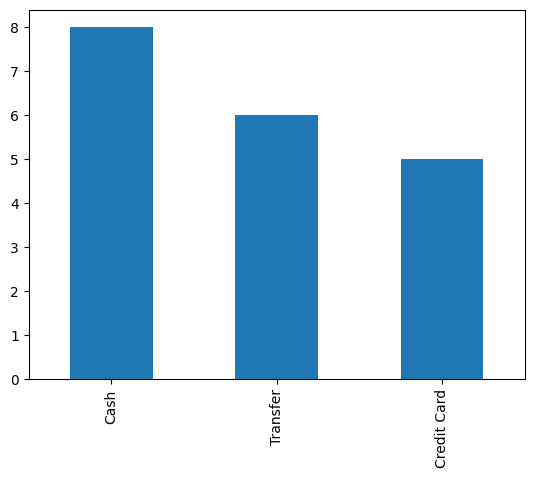

In [63]:
#สร้าง Bar plot ของ Payment Type
df_operations['Payment Type'].value_counts().plot.bar()

<Axes: >

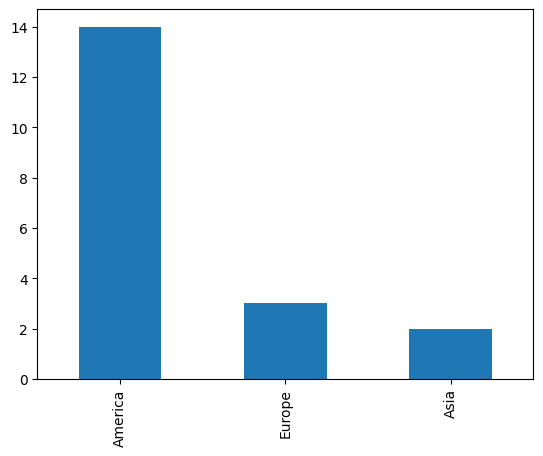

In [64]:
#สร้าง Bar plot ของ Continent
df_operations['Continent'].value_counts().plot.bar()

## Univariate Graphical EDA: Numerical Data

### Histogram

In [65]:
df_operations.head()

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000,150000,240,Canada,America
1,10001,Company,Cash,521400,651750,1043,Japan,Asia
2,10002,Company,Credit Card,451000,563750,902,Mexico,America
3,10003,Company,Transfer,565000,706250,1130,Spain,Europe
4,10004,Person,Transfer,512300,640375,1024,Argentina,America


<Axes: ylabel='Frequency'>

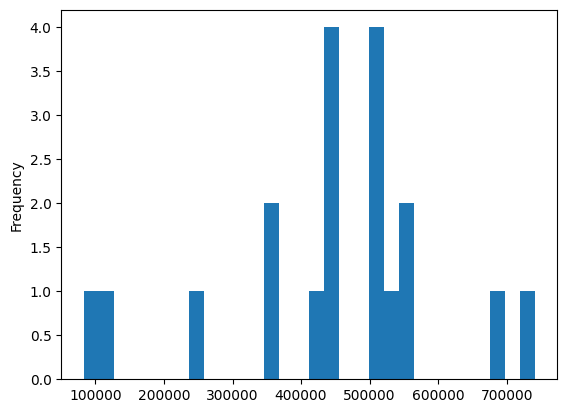

In [66]:
df_operations['Purchases'].plot.hist(bins=30)

### Boxplot

Text(0.5, 1.0, 'Box Plot')

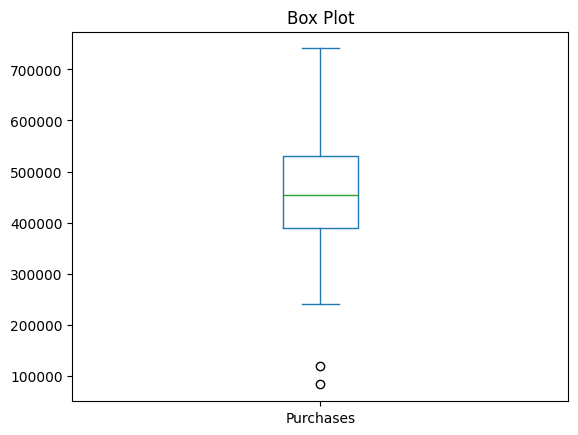

In [67]:
df_operations['Purchases'].plot(kind='box')
plt.title("Box Plot")

## Multivariate Graphical EDA

In [68]:
df_operations.head()

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000,150000,240,Canada,America
1,10001,Company,Cash,521400,651750,1043,Japan,Asia
2,10002,Company,Credit Card,451000,563750,902,Mexico,America
3,10003,Company,Transfer,565000,706250,1130,Spain,Europe
4,10004,Person,Transfer,512300,640375,1024,Argentina,America


<Axes: xlabel='Continent', ylabel='Sales'>

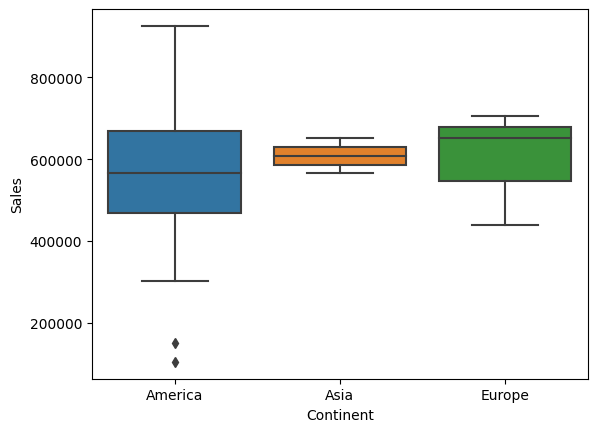

In [69]:
sns.boxplot(x='Continent',y='Sales',data=df_operations)

### Scatter Plot

In [71]:
df_fat = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Data/Fat_Supply_Quantity_Data.csv')
df_fat.head(3)

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0,21.6397,6.2224,0.0,8.0353,0.6859,0.0327,0.4246,6.1244,...,17.0831,0.3593,4.5,29.8,0.053472,0.000938,0.004929,0.047605,38042000.0,%
1,Albania,0.0,32.0002,3.4172,0.0,2.6734,1.6448,0.1445,0.6418,8.7428,...,9.2443,0.6503,22.3,6.2,0.043597,0.001190,0.032820,0.009587,2858000.0,%
2,Algeria,0.0,14.4175,0.8972,0.0,4.2035,1.2171,0.2008,0.5772,3.8961,...,27.3606,0.5145,26.6,3.9,0.023393,0.001629,0.015475,0.006289,43406000.0,%


In [72]:
df_fat.dtypes

Country                          object
Alcoholic Beverages             float64
Animal Products                 float64
Animal fats                     float64
Aquatic Products, Other         float64
Cereals - Excluding Beer        float64
Eggs                            float64
Fish, Seafood                   float64
Fruits - Excluding Wine         float64
Meat                            float64
Miscellaneous                   float64
Milk - Excluding Butter         float64
Offals                          float64
Oilcrops                        float64
Pulses                          float64
Spices                          float64
Starchy Roots                   float64
Stimulants                      float64
Sugar Crops                     float64
Sugar & Sweeteners              float64
Treenuts                        float64
Vegetal Products                float64
Vegetable Oils                  float64
Vegetables                      float64
Obesity                         float64


In [73]:
df_fat.shape

(170, 32)

In [74]:
df_fat.isna().sum()

Country                         0
Alcoholic Beverages             0
Animal Products                 0
Animal fats                     0
Aquatic Products, Other         0
Cereals - Excluding Beer        0
Eggs                            0
Fish, Seafood                   0
Fruits - Excluding Wine         0
Meat                            0
Miscellaneous                   0
Milk - Excluding Butter         0
Offals                          0
Oilcrops                        0
Pulses                          0
Spices                          0
Starchy Roots                   0
Stimulants                      0
Sugar Crops                     0
Sugar & Sweeteners              0
Treenuts                        0
Vegetal Products                0
Vegetable Oils                  0
Vegetables                      0
Obesity                         3
Undernourished                  7
Confirmed                       9
Deaths                          9
Recovered                       9
Active        

In [75]:
df_fat = df_fat.dropna()

In [76]:
df_fat.isna().sum()

Country                         0
Alcoholic Beverages             0
Animal Products                 0
Animal fats                     0
Aquatic Products, Other         0
Cereals - Excluding Beer        0
Eggs                            0
Fish, Seafood                   0
Fruits - Excluding Wine         0
Meat                            0
Miscellaneous                   0
Milk - Excluding Butter         0
Offals                          0
Oilcrops                        0
Pulses                          0
Spices                          0
Starchy Roots                   0
Stimulants                      0
Sugar Crops                     0
Sugar & Sweeteners              0
Treenuts                        0
Vegetal Products                0
Vegetable Oils                  0
Vegetables                      0
Obesity                         0
Undernourished                  0
Confirmed                       0
Deaths                          0
Recovered                       0
Active        

In [80]:
df_fat.shape

(153, 32)

<Axes: xlabel='Animal fats', ylabel='Animal Products'>

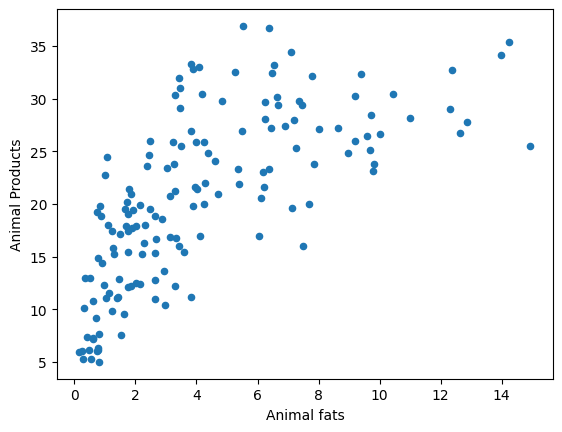

In [77]:
df_fat.plot.scatter(x='Animal fats', y='Animal Products')

<Axes: xlabel='Animal fats', ylabel='Obesity'>

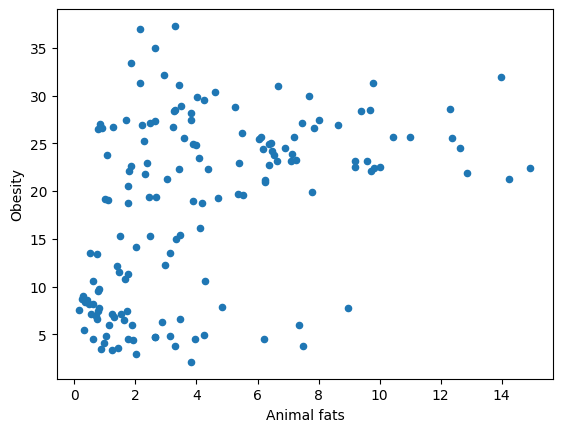

In [81]:
df_fat.plot.scatter(x='Animal fats', y='Obesity')

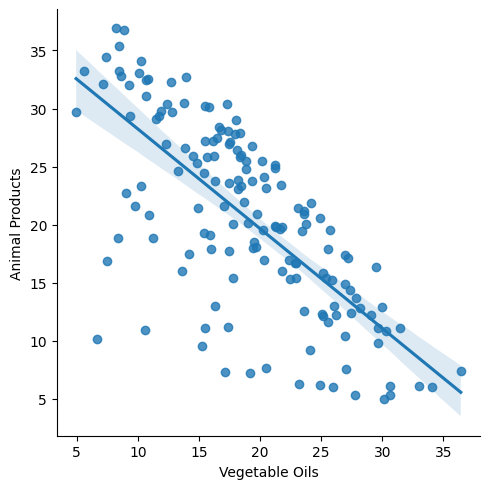

In [78]:
sns.lmplot(x='Vegetable Oils',y= 'Animal Products', data=df_fat)

### Correlation Analysis

In [79]:
from scipy import stats

In [82]:
pearson_coef, p_value = stats.pearsonr(df_fat['Animal Products'], df_fat['Meat'])

In [83]:
pearson_coef

0.7328916489967817

In [84]:
p_value

4.8576340423923476e-27

In [85]:
if p_value < 0.001:
    print("High certainty")
elif p_value < 0.05:
    print("Moderate certainty")
elif p_value < 0.1:
    print("Low certainty")
else:
    print("Lack of certainty")

High certainty


In [87]:
#หาค่า correlation ของ df_fat
c = df_fat.corr()
c

<ipython-input-87-a0c2de81578c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df_fat.corr()


,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Miscellaneous,...,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Confirmed,Deaths,Recovered,Active,Population
Alcoholic Beverages,1.000000,-0.073001,-0.038454,0.752993,0.102943,0.011226,0.089034,-0.050529,-0.018563,-0.070753,...,-0.009394,0.073002,0.016822,0.080996,-0.156183,-0.069525,-0.046470,-0.054083,-0.060187,-0.008035
Animal Products,-0.073001,1.000000,0.692061,0.016641,-0.457003,0.470698,-0.020677,-0.124487,0.732892,0.117789,...,0.151534,-1.000000,-0.713931,0.095125,0.470159,0.322234,0.239970,0.344708,0.150843,0.007574
Animal fats,-0.038454,0.692061,1.000000,-0.002807,-0.407301,0.274596,-0.108941,-0.169718,0.224416,-0.071049,...,0.149287,-0.692050,-0.395492,-0.065497,0.431498,0.268964,0.311397,0.279938,0.119918,0.016123
"Aquatic Products, Other",0.752993,0.016641,-0.002807,1.000000,-0.086429,0.096485,0.127492,-0.043147,0.075514,-0.031919,...,0.053956,-0.016602,0.041843,0.168928,-0.139331,-0.065496,-0.043987,-0.049535,-0.058540,0.127230
Cereals - Excluding Beer,0.102943,-0.457003,-0.407301,-0.086429,1.000000,-0.320935,-0.009845,0.032665,-0.252393,-0.008839,...,-0.218731,0.457000,-0.049867,-0.038698,-0.486522,-0.331121,-0.306322,-0.287433,-0.234332,-0.014723
Eggs,0.011226,0.470698,0.274596,0.096485,-0.320935,1.000000,0.260157,-0.081257,0.260123,0.074869,...,0.280917,-0.470752,-0.241689,0.149731,0.362314,0.320985,0.151367,0.280192,0.246831,0.139200
"Fish, Seafood",0.089034,-0.020677,-0.108941,0.127492,-0.009845,0.260157,1.000000,0.020531,-0.024780,0.461204,...,0.194086,0.020626,-0.172666,0.072942,-0.256848,0.052994,-0.041243,0.031048,0.070911,0.002024
Fruits - Excluding Wine,-0.050529,-0.124487,-0.169718,-0.043147,0.032665,-0.081257,0.020531,1.000000,-0.043305,-0.030698,...,-0.089124,0.124319,-0.075435,0.044352,-0.095962,-0.026553,-0.056772,-0.037120,0.004635,-0.041055
Meat,-0.018563,0.732892,0.224416,0.075514,-0.252393,0.260123,-0.024780,-0.043305,1.000000,0.132481,...,-0.031988,-0.732890,-0.578826,0.044191,0.241952,0.159342,0.058875,0.204672,0.038077,0.025442
Miscellaneous,-0.070753,0.117789,-0.071049,-0.031919,-0.008839,0.074869,0.461204,-0.030698,0.132481,1.000000,...,0.129677,-0.117820,-0.163690,-0.007131,0.022998,0.059035,-0.125256,0.062155,0.054298,-0.051634


<Axes: >

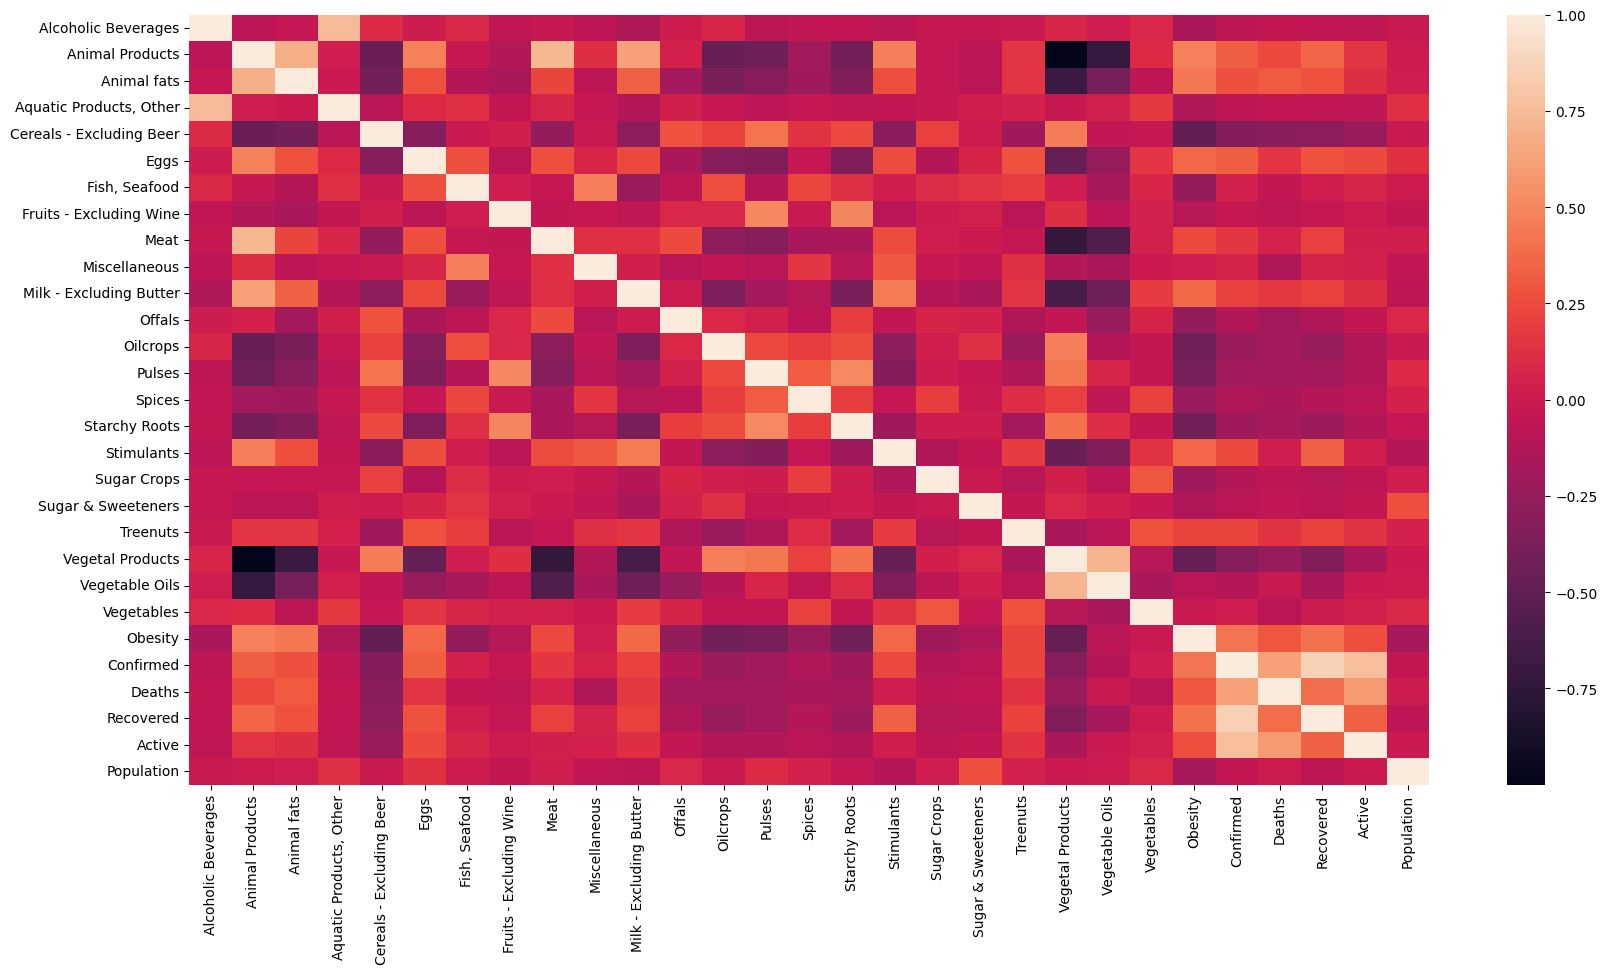

In [88]:
plt.figure(figsize=(20, 10))
sns.heatmap(c)

In [90]:
#หาค่า correlation ของคอลัมน์ Obesity และ Animal Products ใน df_fat
c2 = df_fat[['Obesity','Animal Products']].corr()
c2

,Obesity,Animal Products
Obesity,1.000000,0.470159
Animal Products,0.470159,1.000000


<Axes: >

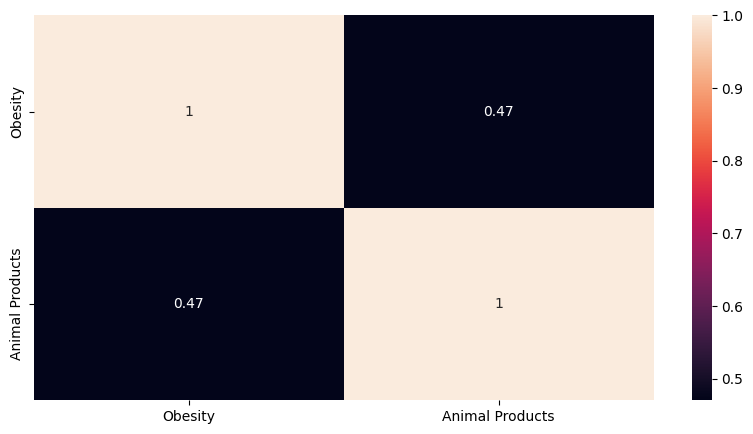

In [91]:
plt.figure(figsize=(10, 5))
sns.heatmap(c2, annot=True)

In [92]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='Animal Products', ylabel='Animal Products'>,
        <Axes: xlabel='Meat', ylabel='Animal Products'>,
        <Axes: xlabel='Obesity', ylabel='Animal Products'>],
       [<Axes: xlabel='Animal Products', ylabel='Meat'>,
        <Axes: xlabel='Meat', ylabel='Meat'>,
        <Axes: xlabel='Obesity', ylabel='Meat'>],
       [<Axes: xlabel='Animal Products', ylabel='Obesity'>,
        <Axes: xlabel='Meat', ylabel='Obesity'>,
        <Axes: xlabel='Obesity', ylabel='Obesity'>]], dtype=object)

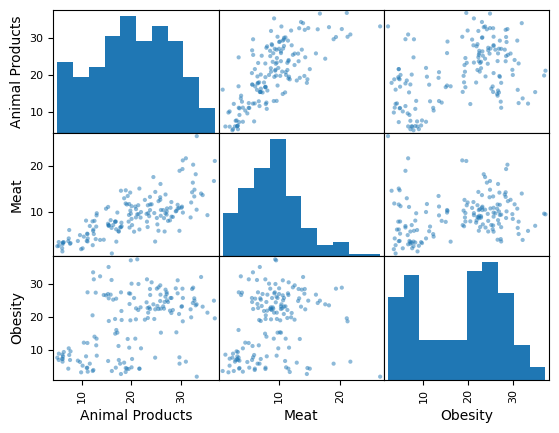

In [93]:
scatter_matrix(df_fat[['Animal Products', 'Meat', 'Obesity']])

### Cross Tab (Categorical)

In [94]:
df_operations.head()

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000,150000,240,Canada,America
1,10001,Company,Cash,521400,651750,1043,Japan,Asia
2,10002,Company,Credit Card,451000,563750,902,Mexico,America
3,10003,Company,Transfer,565000,706250,1130,Spain,Europe
4,10004,Person,Transfer,512300,640375,1024,Argentina,America


In [95]:
cross_tab = pd.crosstab(index=df_operations['Country'], columns=df_operations['Payment Type'])

In [96]:
cross_tab

Payment Type,Cash,Credit Card,Transfer
Country,,,
Argentina,0,0,1
Canada,1,2,1
Chile,1,0,0
EEUU,3,1,2
Germany,0,0,1
Japan,2,0,0
Mexico,0,2,0
Spain,1,0,1


In [97]:
# Country Payment Type
cross_tab_prob = pd.crosstab(index=df_operations['Country'], columns=df_operations['Payment Type'], normalize="index")

In [98]:
cross_tab_prob

Payment Type,Cash,Credit Card,Transfer
Country,,,
Argentina,0.00,0.000000,1.000000
Canada,0.25,0.500000,0.250000
Chile,1.00,0.000000,0.000000
EEUU,0.50,0.166667,0.333333
Germany,0.00,0.000000,1.000000
Japan,1.00,0.000000,0.000000
Mexico,0.00,1.000000,0.000000
Spain,0.50,0.000000,0.500000


<Axes: xlabel='Country'>

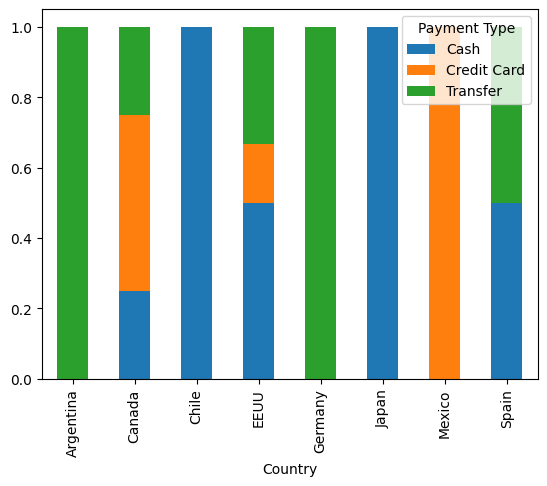

In [99]:
cross_tab_prob.plot(kind='bar', stacked=True)

<Axes: xlabel='Country'>

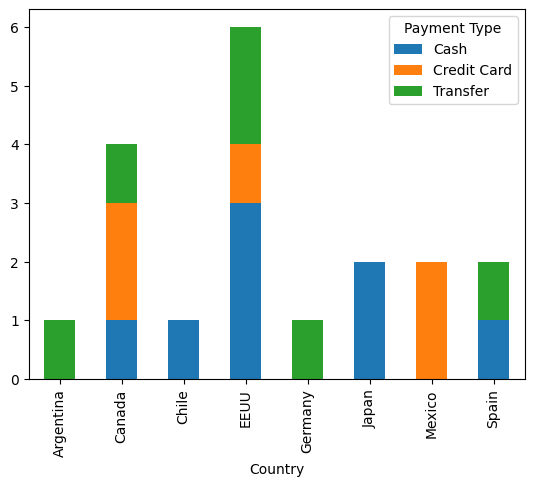

In [100]:
cross_tab.plot(kind='bar', stacked=True)